### Exercise 2

The goal of this exercise is to examine whether Gradient Boosting is prone to overfitting and to investigate the impact of the learning rate. 

For this, use the digits dataset from sklearn (`sklearn.datasets.load_digits`). Reassign the labels such that digits 0 through 4 are categorized as class -1, and all other digits are categorized as class +1. 

**(a)** Randomly divide the data into a training set (75%) and a test set (25%). Apply sklearn's `GradientBoostingClassifier` using two different base learners:

* Decision Trees with a maximum depth of 1 
* Decision Trees with a maximum depth of 3 

For each base learner, identify a sufficiently large number of estimators such that Gradient Boosting nearly achieves a perfect training error. Plot both the training and test errors as functions of the number of estimators.  

**(b)** Apply the `GradientBoostingClassifier` with three different base learners using 10-fold cross-validation:

* Decision Trees with a depth of 1 
* Decision Trees with a depth of 3
* Decision Trees with a depth of 5 

Plot the average test error of each Gradient Boosting variant as a function of the number of estimators.

**(c)** Apply `GradientBoostingClassifier` with a Decision Tree of depth 5 as the base learner and experiment with different learning rates. Use 10-fold cross-validation for this process. Plot the average test error for each variant of Gradient Boosting as a function of the number of estimators.

---
### Imports

In [1]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

---
### Sklearn's Digits Dataset

In [2]:
X, y = load_digits(return_X_y=True)
y[y<5] = -1
y[y>4] = +1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


---
### (a)

In [3]:
def run_a(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    train_error = get_error(clf, X_train, y_train) 
    test_error = get_error(clf, X_test, y_test) 
    n = np.arange(1, len(train_error)+1)
    plt.plot(n, train_error, lw=2, label='train')
    plt.plot(n, test_error, lw=2, label='test')
    plt.legend()
    plt.show()

def get_error(clf, X, y):
    y_hat_staged = np.array(list(clf.staged_predict(X)))
    error = np.zeros(len(y_hat_staged))
    for i, y_hat in enumerate(y_hat_staged):
        error[i] = 1. - accuracy_score(y, y_hat)
    return error


**Base learner:** Decision Trees of depth 1

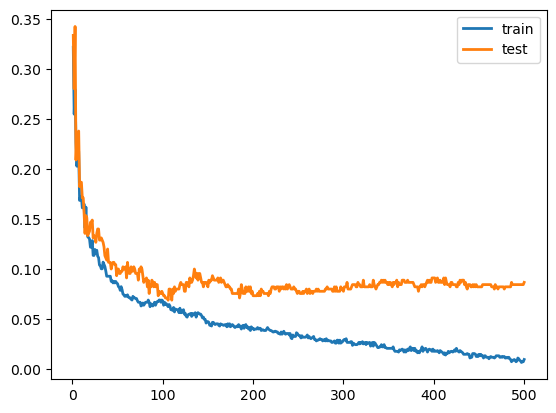

In [4]:
n_estimators=500
clf = GradientBoostingClassifier(loss='exponential', 
                                 criterion='squared_error',
                                 learning_rate=1., 
                                 max_depth=1, 
                                 n_estimators=n_estimators)
run_a(clf, X_train, X_test, y_train, y_test)

**Base learner:** Decision Trees of depth 3

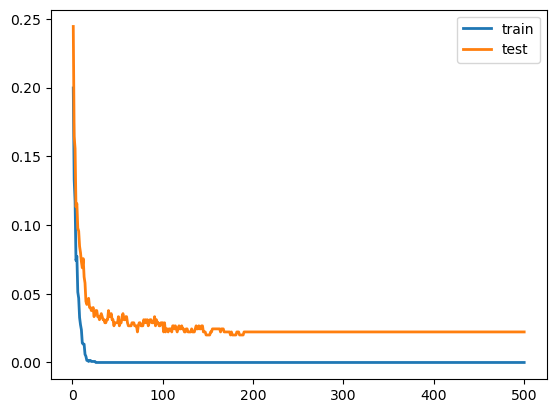

In [6]:
n_estimators=500
clf = GradientBoostingClassifier(loss='exponential', 
                                 criterion='squared_error',
                                 learning_rate=1., 
                                 max_depth=3, 
                                 n_estimators=n_estimators)
run_a(clf, X_train, X_test, y_train, y_test)

---
### (b)

In [8]:
def run_b(X, y, max_depths, n_estimators, cv):
    avg_err = np.zeros((len(max_depths), len(n_estimators)))
    std_err = np.zeros((len(max_depths), len(n_estimators)))
    for i, d in enumerate(max_depths):
        for j, n in enumerate(n_estimators):
            clf = GradientBoostingClassifier(loss='exponential',
                                             criterion='squared_error',
                                             learning_rate=1., 
                                             max_depth=d, 
                                             n_estimators=n)
            scores = cross_val_score(clf, X, y, cv=cv)
            avg_err[i, j] = (1.-scores).mean()
            std_err[i, j] = (1.-scores).std()
    
    for i, depth in enumerate(max_depths):
        plt.plot(n_estimators, avg_err[i], lw=2, label=f'base {depth:d}')
    plt.legend()
    plt.show()

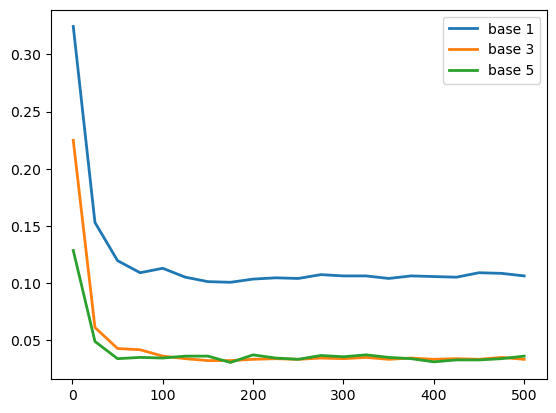

In [9]:
n_estimators = np.arange(0, 501, 25)
n_estimators[0] = 1
max_depths = [1, 3, 5]
run_b(X, y, max_depths, n_estimators, cv=10)

In [ ]:
def run_c(X, y, etas, n_estimators, cv):
    avg_err = np.zeros((len(etas), len(n_estimators)))
    std_err = np.zeros((len(etas), len(n_estimators)))
    for i, eta in enumerate(etas):
        for j, n in enumerate(n_estimators):
            clf = GradientBoostingClassifier(loss='exponential',
                                             criterion='squared_error',
                                             learning_rate=eta, 
                                             max_depth=5, 
                                             n_estimators=n)
            scores = cross_val_score(clf, X, y, cv=cv)
            avg_err[i, j] = (1.-scores).mean()
            std_err[i, j] = (1.-scores).std()
    
    for i, eta in enumerate(etas):
        plt.plot(n_estimators, avg_err[i], lw=2, label=f'lr {eta:.1f}')
    plt.legend()
    plt.show()

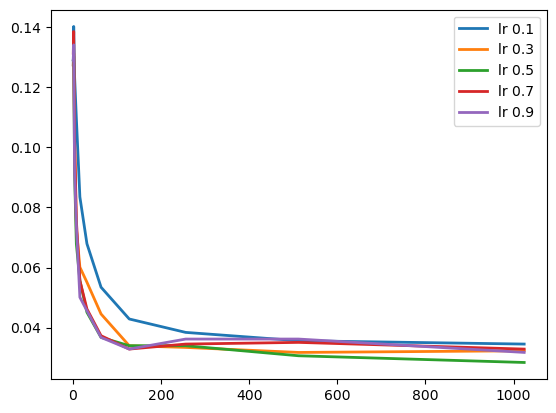

In [ ]:
n_estimators = 2**np.arange(0,11)
n_estimators[0] = 1
eta = np.arange(0.1, 1.0, 0.2)
run_c(X, y, eta, n_estimators, cv=10)